<a href="https://colab.research.google.com/github/Sourav7490/ma22c046_2023_PL/blob/main/Assignment-9/Passengers_of_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn

In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1) How many passengers are described in the data set?

In [3]:
number_passengers=t.shape[0]
print("The number of passengers are described in the data set:",number_passengers)

The number of passengers are described in the data set: 891


2) How many distinct values are in who column?

In [4]:
distinct_values_count = t['who'].nunique()
print("Number of distinct values in the 'who'column",distinct_values_count)

Number of distinct values in the 'who'column 3


3) How many missing values do you find in each data column?

In [5]:
missing_values = t.isnull().sum()
print("The number of missing values in each data column:")
print(missing_values)

The number of missing values in each data column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


4) Does the data contain passengers over 60 old? How many?

In [6]:
passengers_over_60 = t[t['age'] > 60]
number_of_passengers_over_60 = len(passengers_over_60)
print("Number of passengers over 60 years old:", number_of_passengers_over_60)

Number of passengers over 60 years old: 22


5) What is the passenger age distribution? (Plot it.)

In [7]:
import matplotlib.pyplot as plt

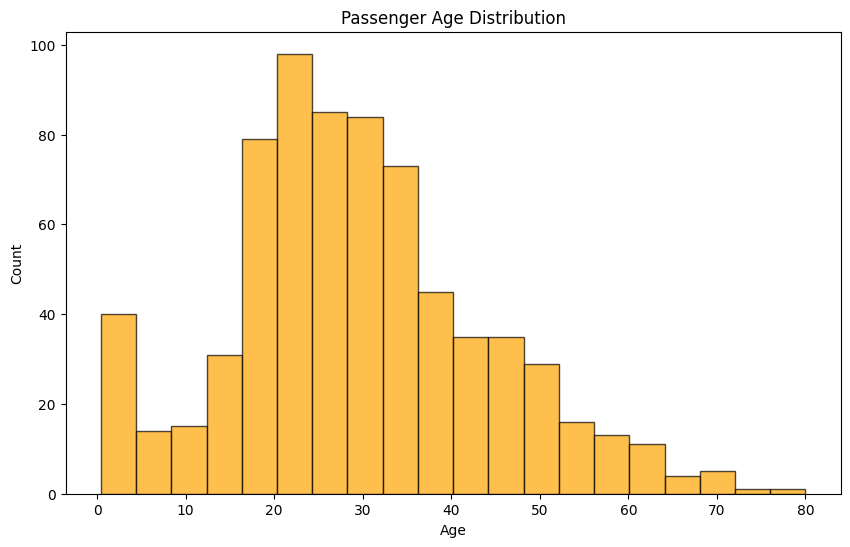

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(t['age'], bins=20, edgecolor='black', alpha=0.7,color='orange')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

6) What are the 3-quantiles of the passenger age distribution?

In [9]:
quantiles = t['age'].quantile([0.25, 0.5, 0.75])

In [12]:
print("Age 3-quantiles:")
print(quantiles)

Age 3-quantiles:
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


7) How will you drop all passengers with no embarked data?

In [13]:
t = t.dropna(subset=['embarked'])

8) What is the average, minimum, and maximum fares paid by the passengers?

In [14]:
average_fare = t['fare'].mean()
minimum_fare = t['fare'].min()
maximum_fare = t['fare'].max()


print("Average Fare:", average_fare)
print("Minimum Fare:", minimum_fare)
print("Maximum Fare:", maximum_fare)

Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


9) What are the proportions of passengers in different classes?

In [15]:
class_proportions = t['class'].value_counts(normalize=True)
print("Proportions of passengers in different classes:")
print(class_proportions)

Proportions of passengers in different classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


10) What is the female to male ratio in each travel class?

In [17]:
gender_class_ratio = t.pivot_table(index='class', columns='sex', aggfunc='size', fill_value=0)
print("Female to male ratio in each travel class:")
print(gender_class_ratio)

Female to male ratio in each travel class:
sex     female  male
class               
First       92   122
Second      76   108
Third      144   347


11) What fraction survived?

In [19]:
survival_fraction = t['survived'].mean()
print(f"The fraction of passengers who survived is: {survival_fraction:.2f}")

The fraction of passengers who survived is: 0.38


12) Are the survival rates of male and female passengers different?

In [20]:
survival_rates_by_gender = t.groupby('sex')['survived'].mean()
print("Survival rates by gender:")
print(survival_rates_by_gender)

Survival rates by gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


13) Are the survival rates of frst, second, and third class passengers different?

In [21]:
survival_rates_by_class = t.groupby('class')['survived'].mean()
print("Survival rates by passenger class:")
print(survival_rates_by_class)

Survival rates by passenger class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


14) How can one print a table of survival rate dependencies on class and gender?

In [22]:
survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("Table of Survival Rates by Class and Gender:")
print(survival_table)


Table of Survival Rates by Class and Gender:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


15) How can one print a table with number of survivors and average fare for each gender
and cabin?

In [23]:
# Assuming you have a DataFrame 't' with columns 'sex', 'class', 'survived', and 'fare'
table = pd.pivot_table(t,
                      index='sex',
                      columns='class',
                      values={'survived': 'survived', 'fare': 'fare'},
                      aggfunc={'survived': 'sum', 'fare': 'mean'})


In [24]:
print(table)

              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.693750  21.970121  16.118810       89     70    72
male     67.226127  19.741782  12.661633       45     17    47
